# 1. K-Means

In [12]:
from sklearn.cluster import KMeans

Decide the optimal number of clusters k 
* The Elbow method

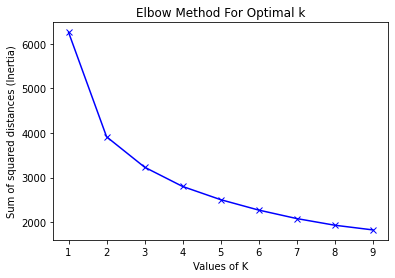

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(transformed_data)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances (Inertia)') 
plt.title('Elbow Method For Optimal k')
plt.show()

* The Silhouette Coefficient

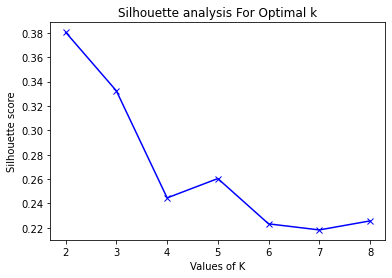

In [14]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(transformed_data)
    cluster_labels = kmeans.labels_
 
 # silhouette score
    silhouette_avg.append(silhouette_score(transformed_data, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

Text(0.5, 1.0, 'Silhouette analysis For Optimal k')

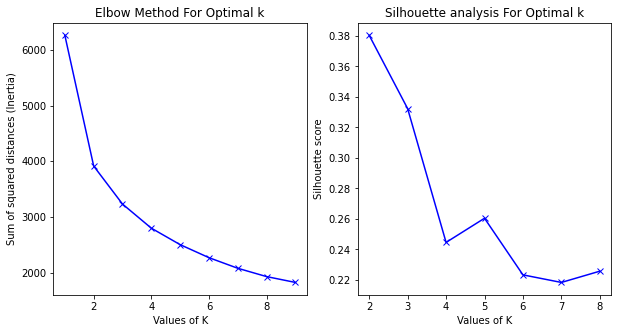

In [15]:
fig,ax=plt.subplots(1,2,figsize=(10, 5))
ax[0].plot(K,Sum_of_squared_distances,'bx-')
ax[0].set_xlabel('Values of K')
ax[0].set_ylabel('Sum of squared distances (Inertia)');
ax[0].set_title('Elbow Method For Optimal k')
ax[1].plot(range_n_clusters,silhouette_avg,'bx-')
ax[1].set_xlabel('Values of K')
ax[1].set_ylabel('Silhouette score')
ax[1].set_title('Silhouette analysis For Optimal k')

In [16]:
n=3
kmeans = KMeans(n_clusters=n, random_state=0).fit(transformed_data)
hidden_states = kmeans.predict(transformed_data)
states = pd.DataFrame(hidden_states,index=train.index)
data_with_state = pd.concat([train,states],axis=1,sort='False').dropna()
data_with_state.rename(columns={0:'state'}, inplace=True)
data_with_state

,momentum_rsi,trend_cci,trend_mass_index,4_week_return,12_week_return,volatility_dcw,others_dr,Open,High,Low,Close,state
Date,,,,,,,,,,,,
1998-01-05,49.231019,-21.616250,26.659479,-0.025085,-0.025433,13.251013,-4.922125,544.479980,548.489990,514.869995,517.679993,0
1998-01-12,55.466632,-12.926268,26.743245,0.013700,0.011403,13.212305,3.484774,517.679993,537.429993,509.190002,535.719971,0
1998-01-19,54.704066,72.650718,26.746042,0.018623,0.038438,13.195110,-0.352788,535.719971,544.729980,530.760010,533.830017,1
1998-01-26,58.449950,-4.272169,26.927275,0.001451,0.047166,13.162906,2.143005,533.830017,551.080017,494.339996,545.270020,1
1998-02-02,63.570821,229.494143,26.950025,0.087969,0.084471,15.488280,3.291938,545.270020,563.950012,545.270020,563.219971,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-11-27,81.055632,144.027797,24.530975,0.021935,0.076021,9.940203,1.433523,1543.500000,1575.079956,1541.109985,1565.880005,1
2017-12-04,81.573289,155.337173,24.709231,0.027411,0.060894,10.258453,0.222238,1568.689941,1580.369995,1553.640015,1569.359985,1
2017-12-11,83.372422,161.455997,24.826581,0.035169,0.066911,10.511165,0.810520,1569.719971,1584.780029,1567.260010,1582.079956,1


In [17]:
def combine_state(df, bull=[], bear=[], static=[]):
    df['new_state'] = df['state'].apply(lambda x: 1 if x in bull else (-1 if x in bear else 0))
    return df

In [18]:
data_with_state = combine_state(data_with_state, bull = [1], bear = [0], static = [2])

In [26]:
from collections import OrderedDict
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import datetime
def plot_candlestick(df,name,x,y,z):
    df = df.reset_index()
    ohlc = df.loc[:, ['Date','Open', 'High', 'Low', 'Close']]
    ohlc['Date']=ohlc['Date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)
    fig, ax = plt.subplots(figsize=(20,10))

    candlestick_ohlc(ax, ohlc.values, width=4, colorup='green', colordown='red', alpha=1)

    # Setting labels & titles
    ax.set_xlabel('Date',fontsize=25)
    ax.set_ylabel('Price',fontsize=25)
    ax.set_title('Weekly Candlestick Chart of Russell3000 by K-means',fontsize=25)

    # Formatting Date
    date_format = mpl_dates.DateFormatter('%Y-%m-%d')
    ax.xaxis.set_major_formatter(date_format)
    plt.xticks(pd.date_range(start='12/31/1997', end='1/01/2018',freq='1y'))
    fig.autofmt_xdate()

    bull = df.loc[df[name] == x , 'Date']
    for day in bull:
        plt.axvspan(day, day + datetime.timedelta(weeks=1), color="green", alpha=0.15,label='bull')
    static = df.loc[df[name] == y , 'Date']
    for day in static:
        plt.axvspan(day, day + datetime.timedelta(weeks=1), color="blue", alpha=0.15,label='static')
    bear = df.loc[df[name] == z , 'Date']
    for day in bear:
        plt.axvspan(day, day + datetime.timedelta(weeks=1), color="red", alpha=0.15,label='bear')
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),fontsize=25)

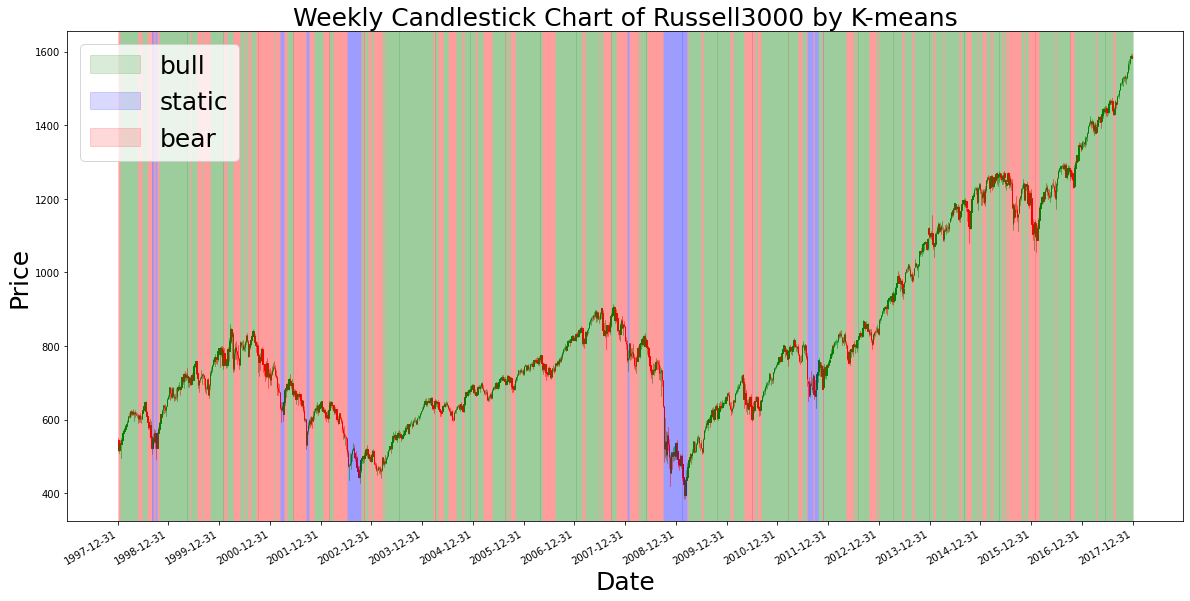

In [27]:
plot_candlestick(data_with_state,'new_state',1,0,-1)